In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
def generate_jacobian(x, h, func_vector):
    g = np.zeros((2, 2), dtype=np.float64);
    for i in range(2):
        for j in range(2):
            h_x = np.array(x, copy=True)
            h_x[0][j] += h[0][j]
            g[i][j] = (func_vector[i](h_x) - func_vector[i](x))/h[0][j]
    return g

In [5]:
def calc_vector_func(x, func_vector):
    res = np.zeros((len(func_vector), 1))
    for i, func in enumerate(func_vector):
        res[i][0] = func(x)
    return res

In [6]:
eps = 1e-6
x_cur = np.random.rand(1, 2)
x_prev = np.random.rand(1, 2)
# function_vector = [lambda x: x[0][0] + x[0][1] + 1, lambda x: x[0][0] - x[0][1]]
function_vector = [lambda x: math.sin(x[0][0] + 1) - x[0][1] - 1.2, lambda x: 2*x[0][0] + math.cos(x[0][1]) - 2]
is_end = False
## cycle
while not is_end:
    negative_f_vector = -calc_vector_func(x_cur, function_vector)
    h_cur = x_cur - x_prev
    jacobi_matrix = generate_jacobian(x_cur, h_cur, function_vector)
    delta_x = np.linalg.solve(jacobi_matrix, negative_f_vector).T
    x_prev = x_cur
    x_cur = x_prev + delta_x
    is_end = np.linalg.norm(x_cur - x_prev) <= eps

In [2]:
x_cur

NameError: name 'x_cur' is not defined

In [39]:
def draw_function_system(func1, func2, x_left, x_right, y_left, y_right):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    x, y = np.meshgrid(
        np.linspace(x_left, x_right, 100),
        np.linspace(y_left, y_right, 100))
    z1 = func1(x, y)
    z2 = func2(x, y)

    ax.plot_surface(x, y, z1)
    ax.plot_surface(x, y, z2)

    plt.show()

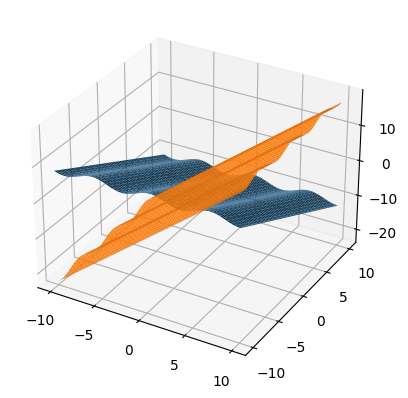

In [48]:
draw_function_system(lambda x,y: np.sin(x + 1) - y - 1.2, lambda x,y: 2*x + np.cos(y) - 2, -10, 10, -10, 10)

In [18]:
    x, y = np.meshgrid(
        np.linspace(-10, 10, 100),
        np.linspace(-10, 10, 100))

In [24]:
function_vector[0]([x, y])

TypeError: only length-1 arrays can be converted to Python scalars

In [26]:
function_vector[0]([[1, 2], [2, 3]])

-2.2907025731743182

In [41]:
f = lambda x, y: x + y


In [44]:
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

In [45]:
x

array([[-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       ...,
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ],
       [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
          9.7979798,  10.       ]])

In [46]:
f(x, y)

array([[-2.00000000e+01, -1.97979798e+01, -1.95959596e+01, ...,
        -4.04040404e-01, -2.02020202e-01,  0.00000000e+00],
       [-1.97979798e+01, -1.95959596e+01, -1.93939394e+01, ...,
        -2.02020202e-01,  1.77635684e-15,  2.02020202e-01],
       [-1.95959596e+01, -1.93939394e+01, -1.91919192e+01, ...,
         0.00000000e+00,  2.02020202e-01,  4.04040404e-01],
       ...,
       [-4.04040404e-01, -2.02020202e-01,  0.00000000e+00, ...,
         1.91919192e+01,  1.93939394e+01,  1.95959596e+01],
       [-2.02020202e-01,  1.77635684e-15,  2.02020202e-01, ...,
         1.93939394e+01,  1.95959596e+01,  1.97979798e+01],
       [ 0.00000000e+00,  2.02020202e-01,  4.04040404e-01, ...,
         1.95959596e+01,  1.97979798e+01,  2.00000000e+01]])

In [47]:
np.sin

<ufunc 'sin'>